In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dynadojo as dd
import numpy as np

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

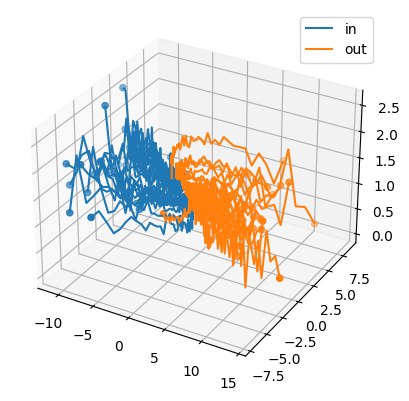

In [4]:
latent_dim = 2
embed_dim = 50
n = 5000
timesteps = 50
challenge = dd.systems.LDSSystem(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = challenge.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.lds.plot([x, y], target_dim=3, labels=["in", "out"], max_lines=30)

In [ ]:
from dynascale.utils.lds import plot
from dynascale.systems.lds import LDSSystem
from dynascale.baselines.dnn import DNN
from dynascale.tasks import FixedTrainSize
import numpy as np
import scipy as sp

In [ ]:
latent_dim = 50
embed_dim = 50
n = 5000
timesteps = 50
challenge = LDSSystem(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = challenge.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
plot([x, y], target_dim=3, labels=["in", "out"], max_lines=30)

In [ ]:
model = DNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=1000, verbose='auto')

In [ ]:
x_pred = model.predict(x[:, 0], 50)
y_pred = model.predict(y[:, 0], 50)
plot([x_pred, x, y_pred, y], target_dim=3, labels=["x_pred", "x", "y_pred", "y"], max_lines=10)

In [ ]:
# task = FixedTrainSize(n=5000, L=[50], T=[50], max_control_cost_per_dim=0, control_horizons=0, test_examples=10, reps=0,
#                       test_timesteps=50, challenge_cls=LDSSystem)
# data = task.evaluate(model_cls=Simple, fit_kwargs={"epochs": 5})